# **Objective-** Apply k-means++ and k-medoids clustering to Amazon food reviews dataset (Tfidf representation)

#### **About the dataset**
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

* Number of reviews: 568,454 
* Number of users: 256,059 
* Number of products: 74,258 
* Timespan: Oct 1999 - Oct 2012 
* Number of Attributes/Columns in data: 10

##### **Attribute Information**:

1. Id ProductId - unique identifier for the product 
2. UserId - unqiue identifier for the user ProfileName 
3. HelpfulnessNumerator - number of users who found the review helpful 
4. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not 
5. Score - rating between 1 and 5 
6. Time - timestamp for the review 
7. Summary - brief summary of the review 
8. Text - text of the review

#### **Codes for-**
* Apply k-means++ and k-medoids algo to tfidf featurization.
* Apply elbow method to plot loss vs k graph.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import warnings
warnings.filterwarnings('ignore')

## **1. Loading data**

In [5]:
#Loading the already prepared data
data=pd.read_csv('data.csv')
data.head(7)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh recit car dr...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year sister late...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...
3,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur star michael keat...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni keaton hilari wacki g...
5,212533,230348,B00004RYGX,A1048CYU0OV4O8,Judy L. Eans,2,2,1,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,b'one movi movi fill whatev els want call'
6,212458,230269,B00004RYGX,A1B2IZU1JLZA6,Wes,19,23,0,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",b'alway enjoy funni didnt hesit pick clamshel ...


In [11]:
# taking 100k datapoints
sample_data=data.iloc[:100000]
final_string=[]
for sentence in sample_data['Cleaned_text'].values:
    line=[]
    for word in sentence.split():
        if(word==sentence.split()[0]):
            word=word[2:]
        line.append(word)
    str1=" ".join(line)    
    final_string.append(str1)

## **2. Applying k-means clustering method to Tfidf representation**

In [15]:
tfidf=TfidfVectorizer(ngram_range=(1,1))
train=tfidf.fit_transform(final_string)
train=normalize(train)

In [16]:
# code borrowed from http://www.awesomestats.in/python-cluster-validation/
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init=5 )
  clusters.fit( train )
  cluster_errors.append( clusters.inertia_ )

In [18]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

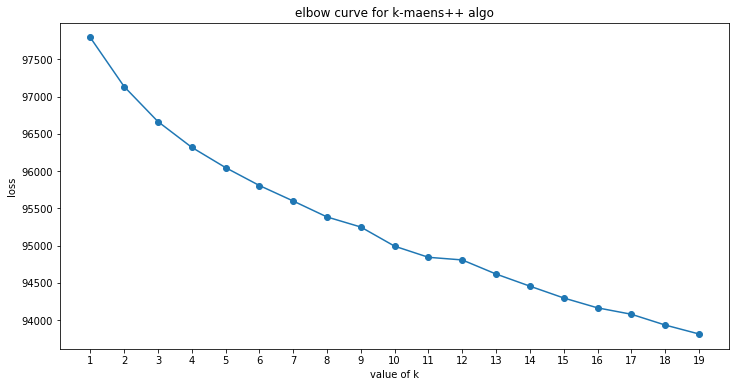

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( list(range(1,20)), clusters_df.cluster_errors, marker = "o" )
plt.xticks(list(range(1,20)))
plt.title('elbow curve for k-maens++ algo')
plt.xlabel('value of k')
plt.ylabel('loss')
plt.show()

In [25]:
sample_data['cluster_label']=clusters.labels_

In [26]:
sample_data.head(5)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text,cluster_label
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh recit car dr...,18
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year sister late...,18
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...,18
3,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur star michael keat...,18
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni keaton hilari wacki g...,10


In [27]:
label=sample_data.groupby(['cluster_label'])['cluster_label'].count()

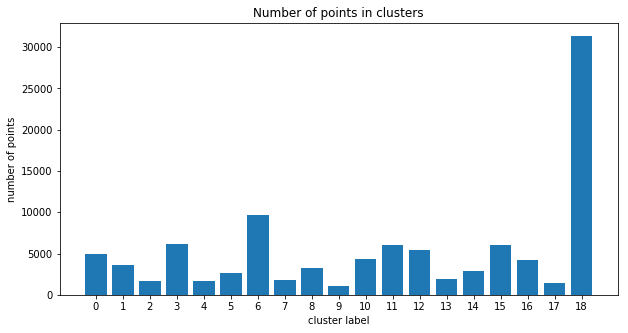

In [28]:
plt.figure(figsize=(10,5))
plt.bar(list(range(0,19)), label)
plt.xticks(list(range(0,19)))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

In [29]:
#randomly select reviews from each cluster

import random

for i in range(19):
    id=list(sample_data['Id'][sample_data['cluster_label']==i])
    random_id=[]
    for j in range(5):
        number=random.choice(id)
        random_id.append(number)
        id.remove(number)
    print('selected random reviews from cluster label : ',i)
    print('*'*60)
    for j in random_id:
        print(sample_data[sample_data['Id']==j].iloc[0]['Text'])
        print('\n')
        
        

selected random reviews from cluster label :  0
************************************************************
After receiving a K-cup coffee maker for Christmas, I have tried many coffees. This is absolutely my favorite so far. Its rich and flavorful, not bitter. I used to roast and grind my own beans, this is so much more convenient and very tasty.


I purchase a number of brands of K-Cups and Timothy's is one of them. It has taken quite a while to find the various brands/flavors that receive my most favorable reviews and Timothy's Italian Blend is one that I highly recommend. I prefer a bold cup of coffee, but not a cup that will leave your eyes the size of silver dollars. This particular coffee provides very substantial flavor with a slightly nutty finish and is not bitter at all. The Italian Blend is one of my particular favorites and I've re-ordered it several times. Hence, if you're looking for a NOT TOO BOLD flavor, along with a noticably nutty finish, this coffee is for you!!




#### **Obsservation--**
1. well grouped in the clusters.
2. the reviews in the cluster seems to be from the group i.e talks on similar object.
3. effected by outliers.

## **3. Applying k-medoids clustering method to Tfidf representation**

In [6]:
# taking 25k datapoints
sample_data=data.sample(25000)
final_string=[]
for sentence in sample_data['Cleaned_text'].values:
    line=[]
    for word in sentence.split():
        if(word==sentence.split()[0]):
            word=word[2:]
        line.append(word)
    str1=" ".join(line)    
    final_string.append(str1)

In [7]:
tfidf=TfidfVectorizer(ngram_range=(1,1))
train=tfidf.fit_transform(final_string)
train=normalize(train)

In [8]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(train, metric='euclidean')
D.shape

(25000, 25000)

In [10]:
# For finding the loss.
def compute_loss(M, C, data): # Squared Loss. !!
    loss = 0.0
    for key, arr in C.items():
        for pos in arr:
            loss = loss + ((data[M[key]] - data[pos]).sum()) ** 2
    
    return loss

In [11]:
# code borrowed from https://raw.githubusercontent.com/letiantian/kmedoids/master/kmedoids.py

import numpy as np
import random

def kMedoid(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [12]:

# Choosing the best cluster using Elbow Method.# Choosi 
cluster_range=list(range(2,20))
errors = []
for cluster in cluster_range:
    M, C = kMedoid(D, cluster) # Training Clustering.
    errors.append(compute_loss(M, C, train))
    #print(cluster)

In [13]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": errors } )

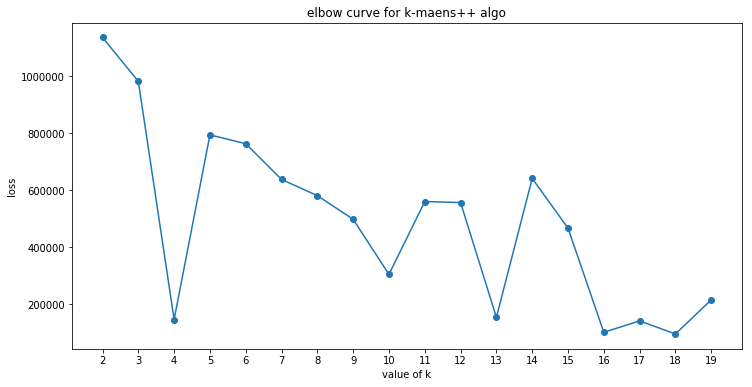

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( list(range(2,20)), clusters_df.cluster_errors, marker = "o" )
plt.xticks(list(range(2,20)))
plt.title('elbow curve for k-maens++ algo')
plt.xlabel('value of k')
plt.ylabel('loss')
plt.show()

In [16]:
optimal_clusters = np.argmin(errors)+2
print('Optimal number of clusters = ',optimal_clusters)

Optimal number of clusters =  18


In [17]:
# k-medoids using optimal number of clusters
M,C=kMedoid(D,optimal_clusters)

In [18]:
#finding each clusters length
cluster_label=[]
label_length=[]
for i in range(len(C)):
    label_length.append(len(C[i]))
    cluster_label.append(i)

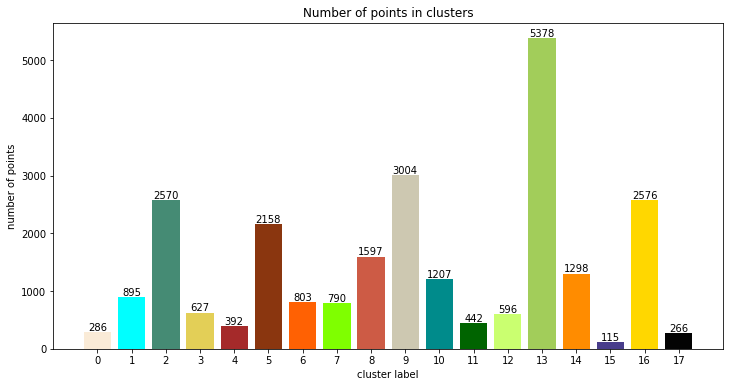

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
mycolors = ['#FAEBD7', '#00FFFF', '#458B74', '#E3CF57', '#A52A2A', '#8A360F', '#FF6103', '#7FFF00', '#CD5B45', '#CDC8B1', '#008B8B', '#006400', '#CAFF70', '#A2CD5A', '#FF8C00', '#483D8B', '#FFD700', '#030303']
rects1 = ax.bar(cluster_label, label_length, color=mycolors)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
plt.xticks(list(range(0,len(cluster_label))))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

In [25]:
#randomly select reviews from each cluster

import random

for i in range(len(C)):
    id=list(C[i])
    random_id=[]
    if(len(C[i])<3):
        num=len(C[i])
    else:
        num=3
    for j in range(num):
        number=random.choice(id)
        random_id.append(number)
        id.remove(number)
    print('selected random reviews from cluster label : '.upper(),i)
    print('*'*60)
    print('central review')
    print('-'*30)
    print(sample_data.iloc[M[i]]['Text'])
    print('-'*30)
    print('review belongs to cluster ',i)
    print('-'*30)
    for j in random_id:
        print(sample_data.iloc[j]['Text'])
        print('\n')
        
        

SELECTED RANDOM REVIEWS FROM CLUSTER LABEL :  0
************************************************************
central review
------------------------------
I moved to the US from the UK over 30 years ago and Lipton's tea was a huge let down.  I've managed to find reasonable black tea at asian food stores or in the specialty aisle at big supermarkets but nothing compares with Yorkshire Gold.  I grew up very close to Harrogate so it's always a nostalgic moment when I reach into the box to grab a bag and see images of the Yorkshire countryside.
------------------------------
review belongs to cluster  0
------------------------------
I just made my first cup, and the tea lives up to its great reputation. I'd been wanting to try this brand since I found out that my great- great-grandfather was a Dane from Yorkshire, who immigrated to the USA. I'm sitting here in the US Heartland having my first cuppa Yorkshire Gold. I will buy this again, absolutely. I made it in a pre-warmed mug with 1/2 s

#### **Observation--**
1. well grouped in clusters, easily find the similarity between the central review and random reviews
2. there are some reviews which do not match with central review, it could be an outlier.

## **Conclusion--**
* both the method of clustering group the reviews in a semantic way.